In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

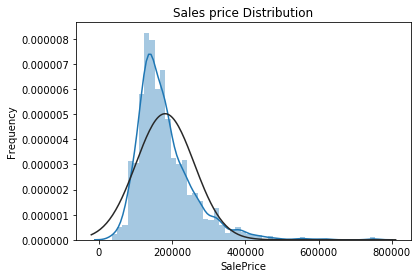

In [64]:
#Plot the distribution with a histogram and maximum likelihood gaussian distribution fit:
#the black line is maximum likelyhood fit
#we observe that the data  is right skewed i.e it has tail towards the right
from scipy.stats import norm
sns.distplot(train['SalePrice'],fit=norm)
plt.ylabel('Frequency')
plt.title('Sales price Distribution')
(mu,sigma) = norm.fit(train['SalePrice'])

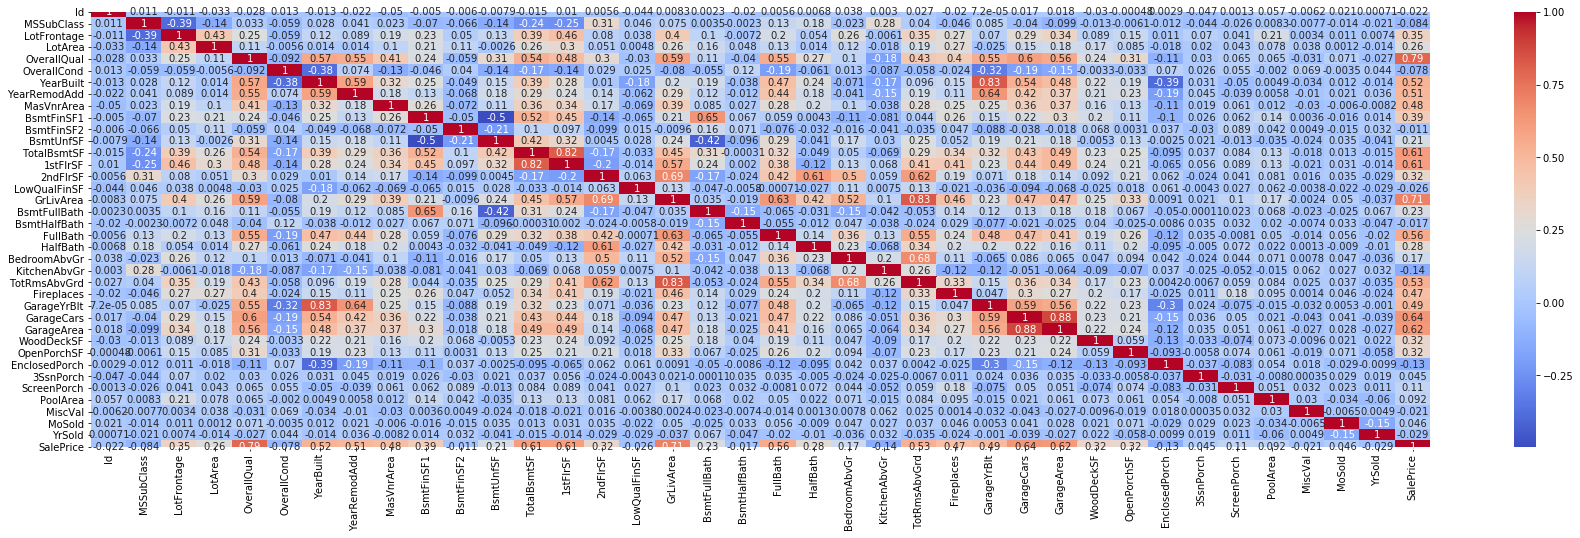

In [65]:
plt.figure(figsize = (30,8))
sns.heatmap(train.corr(),cmap='coolwarm',annot=True)
plt.show()

# from the above code we observe most corelated parameters in numeric values above plotting and we can pick this features for our ml model

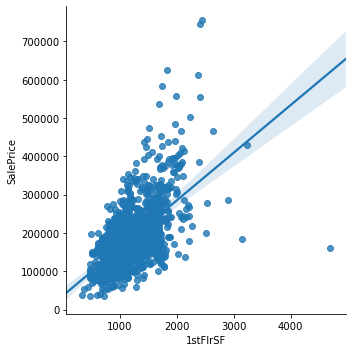

In [66]:
# 1stFlrSf seems very corelated with Sales price
sns.lmplot(x='1stFlrSF',y='SalePrice',data=train)

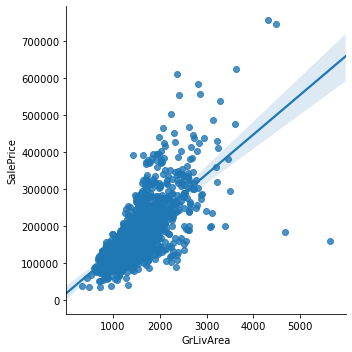

In [67]:
#GrLivArea ground living area seams challenging factor with 0.71 pearson coefficient
sns.lmplot(x='GrLivArea',y='SalePrice',data=train)

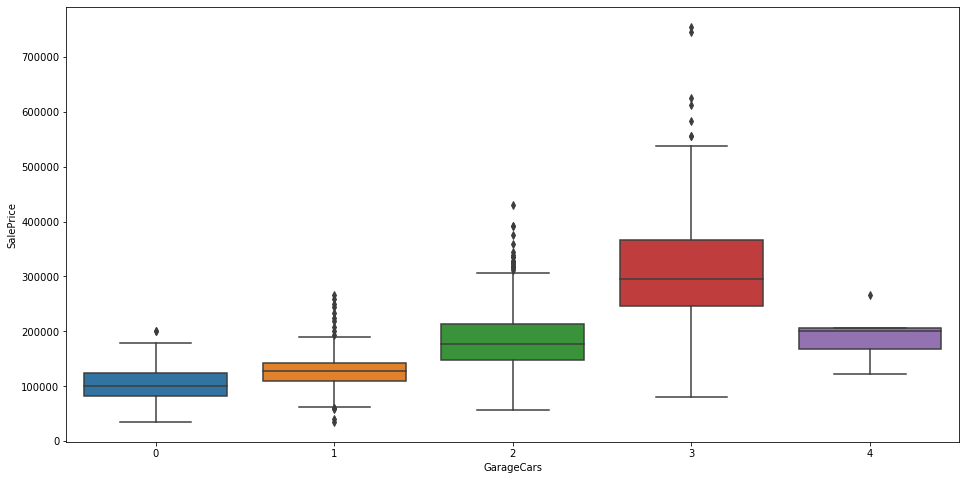

In [68]:
plt.figure(figsize = (16,8))
sns.boxplot(x='GarageCars',y='SalePrice',data=train)
plt.show()

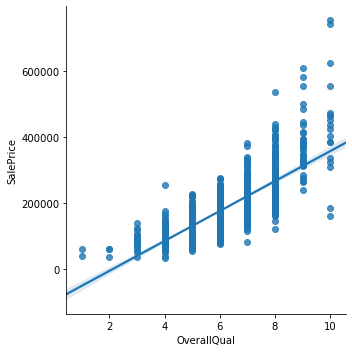

In [69]:
sns.lmplot(x='OverallQual',y='SalePrice',data=train)

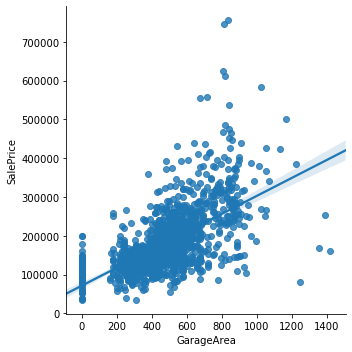

In [70]:
sns.lmplot(x='GarageArea',y='SalePrice',data=train)

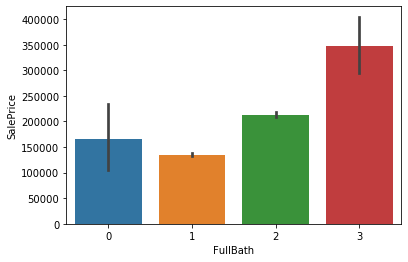

In [71]:
sns.barplot(x='FullBath',y='SalePrice',data=train)

In [227]:
#we need to convert all columns into numeric or categorical data
#mising data
total = train.isnull().sum().sort_values(ascending = False)
percent = ((train.isnull().sum())/(train.isnull().count())).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])

In [228]:
test = test.drop(columns = missing_data[missing_data['Total'] > 81].index)
test.isnull().sum().sort_values(ascending = False).head(20)

GarageYrBlt     78
GarageFinish    78
GarageCond      78
GarageQual      78
GarageType      76
BsmtCond        45
BsmtQual        44
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
MasVnrType      16
MasVnrArea      15
MSZoning         4
BsmtHalfBath     2
Functional       2
Utilities        2
BsmtFullBath     2
Exterior2nd      1
Exterior1st      1
KitchenQual      1
dtype: int64

In [229]:
train = train.drop(columns = missing_data[missing_data['Total'] > 81].index)
train.isnull().sum().sort_values(ascending=False).head(20)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCond      81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
Electrical       1
RoofMatl         0
RoofStyle        0
SalePrice        0
Exterior1st      0
Exterior2nd      0
YearBuilt        0
ExterQual        0
dtype: int64

In [230]:
#we need to handel missing data
#categorical boolean mask
categorical_feature_mask = train.dtypes == object
#filter categoracal columns using mask and turn it into a list
categorical_columns = train.columns[categorical_feature_mask].tolist()

In [231]:
#data = pd.get_dummies(data,columns=categorical_columns)

In [232]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train[categorical_columns] = train[categorical_columns].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [233]:
train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


In [234]:
categorical_feature_mask_test = test.dtypes == object
categorical_columns_test = test.columns[categorical_feature_mask_test].tolist()


In [235]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
test[categorical_columns_test] = test[categorical_columns_test].apply(lambda col : label_encoder.fit_transform(col.astype(str)))

In [236]:
#as we can observe by label encoding most of the values are made not null there remains two because they were numerical values
train.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     81
MasVnrArea       8
ExterCond        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
SalePrice        0
YearRemodAdd     0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
Foundation       0
YearBuilt        0
dtype: int64

In [237]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [238]:
test.isnull().sum().sort_values(ascending = False)

GarageYrBlt     78
MasVnrArea      15
BsmtFullBath     2
BsmtHalfBath     2
TotalBsmtSF      1
                ..
Electrical       0
CentralAir       0
HeatingQC        0
Heating          0
Id               0
Length: 74, dtype: int64

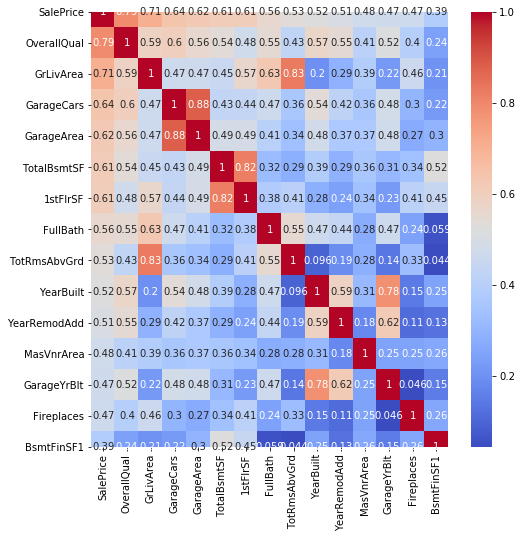

In [239]:
#lets select some features which are mostly corelated for our model
k = 15 # number of variables for heatmap

corrmat = train.corr()
impcols = corrmat['SalePrice'].sort_values(ascending = False).head(15).index.tolist()
important_train_data = train.loc[:,impcols]
important_corrmat = important_train_data.corr()
plt.figure(figsize = (8,8))
sns.heatmap(important_corrmat,cmap='coolwarm',annot=True)
plt.show()


In [240]:
to_train = important_train_data

In [241]:
to_train
#training data is fully prepared

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
0,208500,7,1710,2,548,856,856,2,8,2003,2003,196.0,2003.0,0,706
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1976.0,1,978
2,223500,7,1786,2,608,920,920,2,6,2001,2002,162.0,2001.0,1,486
3,140000,7,1717,3,642,756,961,1,7,1915,1970,0.0,1998.0,1,216
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,2000.0,1,655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,2000,0.0,1999.0,1,0
1456,210000,6,2073,2,500,1542,2073,2,7,1978,1988,119.0,1978.0,2,790
1457,266500,7,2340,1,252,1152,1188,2,9,1941,2006,0.0,1941.0,2,275
1458,142125,5,1078,1,240,1078,1078,1,5,1950,1996,0.0,1950.0,0,49


In [242]:
test = test.loc[:,impcols]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [243]:
test.drop(columns = 'SalePrice',inplace=True)

In [244]:
test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,0.0,1961.0,0,468.0
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,108.0,1958.0,0,923.0
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,0.0,1997.0,1,791.0
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,20.0,1998.0,1,602.0
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,0.0,1992.0,0,263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,0.0,546.0,546,1,5,1970,1970,0.0,NaN,0,0.0
1455,4,1092,1.0,286.0,546.0,546,1,6,1970,1970,0.0,1970.0,0,252.0
1456,5,1224,2.0,576.0,1224.0,1224,1,7,1960,1996,0.0,1960.0,1,1224.0
1457,5,970,0.0,0.0,912.0,970,1,6,1992,1992,0.0,NaN,0,337.0


In [245]:
test.isnull().sum().sort_values(ascending = False).head(6)

GarageYrBlt    78
MasVnrArea     15
BsmtFinSF1      1
TotalBsmtSF     1
GarageArea      1
GarageCars      1
dtype: int64

In [246]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())

In [290]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train.drop(columns = 'SalePrice'),train['SalePrice'],test_size = 0.3)

In [291]:
#lets scale the data
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/jupyterlab/conda/envs/python/lib/p

In [292]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [293]:
lm.intercept_

array([0.00015442])

In [294]:
lm.coef_

array([[-7.39708513e-03, -4.96124759e-02, -8.92730505e-03,
         3.72064427e-02,  2.36740019e-02, -1.43065176e-02,
         3.21401145e-02, -2.24156214e-02,  1.09905081e-02,
         2.42800558e-02,  2.65812721e-02, -7.72331698e-03,
        -4.13212352e-02, -3.93148445e-02, -3.53007684e-02,
         2.19379704e-01,  5.26986852e-02,  1.05532157e-01,
         2.06773787e-02,  2.14811599e-02,  3.00575656e-03,
        -4.35047089e-02,  2.77140179e-02,  3.66518989e-02,
         8.23867157e-02, -9.35992872e-02,  4.19606158e-03,
         4.09999656e-02, -8.49331948e-02,  9.17963373e-03,
        -5.08586488e-02, -2.28806157e-02,  5.82061238e+11,
         1.82266235e-02,  2.06773991e+11,  5.61249446e+11,
        -5.55507708e+11, -1.15661621e-02, -1.85089111e-02,
        -4.15992737e-03, -5.53131104e-03,  8.78003560e+10,
         9.82753048e+10,  1.09051142e+10, -1.18001984e+11,
         6.83374405e-02, -2.59399414e-04,  3.32431793e-02,
         1.69391632e-02, -4.25987244e-02, -3.77922058e-0

In [295]:
predictions = lm.predict(X_test)
predictions = predictions

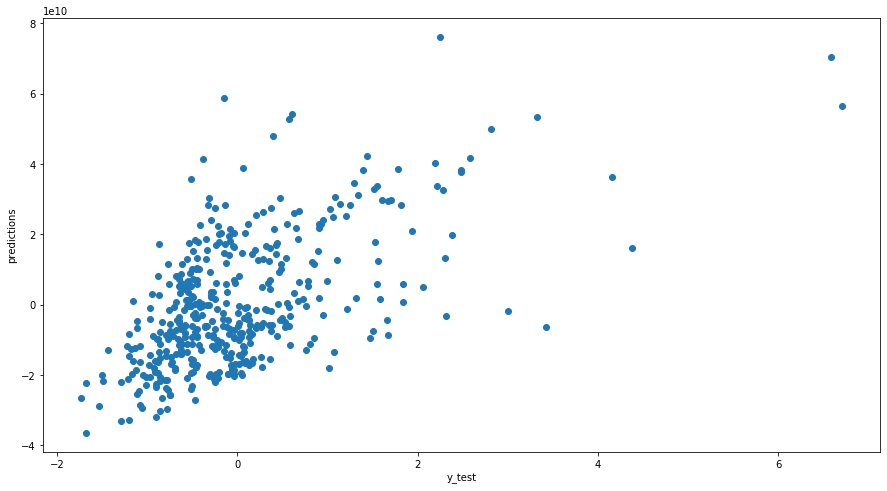

In [296]:
plt.figure(figsize = (15,8))
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show()

In [297]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))


MAE: 14212604705.115494
MSE: 3.2836463271475485e+20


In [298]:
metrics.r2_score(y_test,predictions)

-3.283646327147548e+20

In [299]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 18120834216.855328


In [303]:
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lm,parameters, cv=6)
grid.fit(X_train, y_train)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [304]:
grid.best_estimator_

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=True)

In [305]:
grid.best_score_

0.700697691684548

In [307]:
metrics.r2_score(grid.predict(X_test),y_test)

4.21809254191885e-11

In [309]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor()
dtreg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [310]:
dtr_predict = dtreg.predict(X_test)

In [312]:
dtr_predict = dtr_predict.reshape(-1,1)

In [314]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_predict))
print('MSE:', metrics.mean_squared_error(y_test, dtr_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_predict)))

MAE: 0.33976958003651525
MSE: 0.26794887163421716
RMSE: 0.5176377803389327


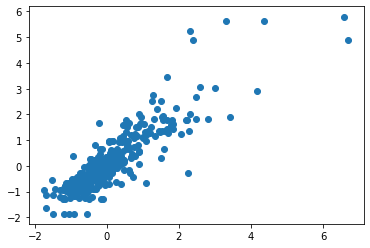

In [315]:
plt.scatter(y_test,dtr_predict)